# Functions and Domains

Functions are members of infinite dimensional spaces. Before talking about those spaces, we will look at how to create some functions regardless of which space they are part of. 

Any function is defined over some domain. The abstract class "Domain" deals with domains. We can import all the available domains from the "domains" module:

In [1]:
from sola.main_classes.domains import *


Right now the only concrete class is the "HyperParalelipiped" which defines domains such as 1D intervals, 2D rectangles with sides parallel to the axes, 3D parallelipipeds with sides parallel to the axes, and higher order hyperparallelipipeds. Basically, it can deal with any finite number of cartesian products of 1D intervals. 

To instantiate the closed interval $[0,1]$ domain object we do  

In [2]:
my_domain = HyperParalelipiped(bounds=[[0,1]])

The bounds are defined as follows:
[[a,b],[c,d],[e,f],[g,h]...]
where each sublist is a 1D interval, and the whole list represents a cartesian product of all sublists. In our case there is only one sublist because we have a 1D domain. 

The "fineness" argument (not used here) defines how many uniformly spaced points should be used by default when doing numerical computations on this domain (by default 1000). The mathematical domain $[0,1]$ is continuous, but in practice we need some discretization when we plot or when we compute an integral. When actually computing stuff, we will always have the option to pass a new "fineness" argument that will change the fineness only for that computation. 

When creating a domain we automatically receive a "mesh" which is just a "np.linspace" with "fineness" number of points:

In [ ]:
print(my_domain.mesh)

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

That is the default mesh, but since this objects represents a continuous interval, we can always produce new, finer or coarser, meshes using the "dynamic_mesh" method:

In [1]:
print(my_domain.dynamic_mesh(fineness=10))

NameError: name 'my_domain' is not defined

These dynamic meshes are efemere and, if not stored, they dissapear after being used. 

We can also randomly (and uniformly) sample the domain: 

In [5]:
print(my_domain.sample_domain(N=10))

[[0.2036093 ]
 [0.81208115]
 [0.9377449 ]
 [0.62169001]
 [0.3831907 ]
 [0.69759081]
 [0.85940644]
 [0.04058875]
 [0.0744819 ]
 [0.37907622]]


Where N is the number of samples. 

We can also check if a point is in the domain

In [6]:
print(my_domain.check_if_in_domain(0.5)) # true
print(my_domain.check_if_in_domain(5)) # false
# The following should rise and exception because the value is not of the correct type.
try:
    print(my_domain.check_if_in_domain(2j)) # exception
except Exception as e:
    print(f"An error occurred: {e}")

True
False
An error occurred: Wrong dimension or type


And we can print the toal measure of the domain (length/area/volume,etc):

In [7]:
print(my_domain.total_measure)

1


Now we can create some functions on this domain. Functions are dealt with in the "functions" module. There we have an abstract class "Function" and a variety of concrete classes that inherit from "Function" but add their own form (such as gaussian, boxcar, etc...). In this package, functions are not simply arrays of values; those are elements of some finite space, but we want true functions which are elements of an infinite dimensional space. Our functions, as defined in the "functions" file can be evaluated at any point within their domain of definition.

In [8]:
from sola.main_classes.functions import *

For example, let's create an instance of a 1D gaussian function defined on our domain $[0,1]$:

In [9]:
gaussian = Gaussian_1D(domain=my_domain, center=0.5, width=0.2)

The width is related to the standard deviation via $width=5 \sigma \sqrt{2\ln(2)}$ (where $\sigma$ is the standard deviation), which is an arbitratry choice that ensures most of the area of the gaussian is contained within the width (99.68% more specifically).

As mentioned before, we can evaluate functions at any points within their domain. This is done using the ".evaluate()" method. The .evaluate() method will return not only the values at the desired points, but also the points where it was evaluated if "return_points" is set to True.

In [18]:
print(gaussian.evaluate(0.5))
print(gaussian.evaluate(0.7, return_points=True))

[11.74296598]
(array([0.7]), array([3.49967658e-07]))


By default, the function will be evaluated only at points that are in its domain. For example:

In [20]:
mesh = np.linspace(-1,1,10) # contains points outside the domain
# So it evaluates only at points in [0,1]
print(gaussian.evaluate(mesh, return_points=True))

(array([0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ]), array([4.12989945e-28, 6.97529533e-05, 3.08380725e+00, 3.56872720e-14,
       1.08103805e-46]))


We can force it to evaluate at all points passed to it by turning off the "check_if_in_domain" flag. In that case, if we pass an array with points outside the domain, the function will try to evaluate them, but there is no guarantee that it will do what you think it does:

In [21]:
mesh = np.linspace(-1,1,5)
# In this case the function can be evaluatyed at [-1,0] as well, so it has no issues
print(gaussian.evaluate(mesh, check_if_in_domain=False, return_points=True))

(array([-1. , -0.5,  0. ,  0.5,  1. ]), array([0.00000000e+000, 8.43394011e-188, 1.08103805e-046, 1.17429660e+001,
       1.08103805e-046]))


Now let's plot this function:

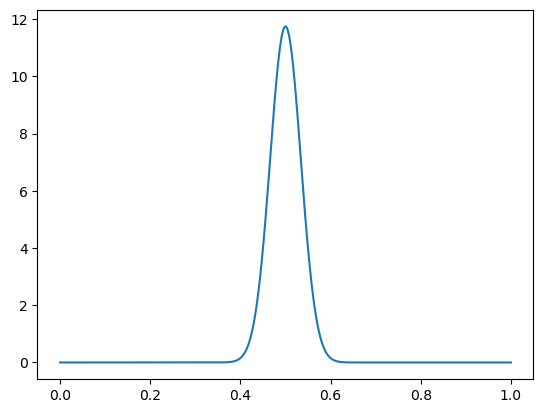

In [13]:
%matplotlib inline
gaussian.plot()

The functions module contains more functions, and more can be added by the user as long as they follow the given template.

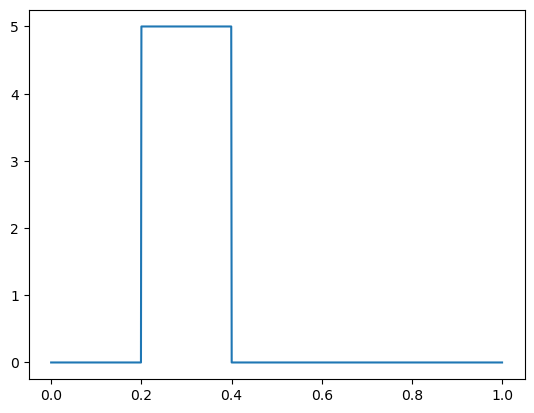

In [14]:
%matplotlib inline
boxcar = Boxcar_1D(domain=my_domain, center=0.3, width=0.2)

boxcar.plot()

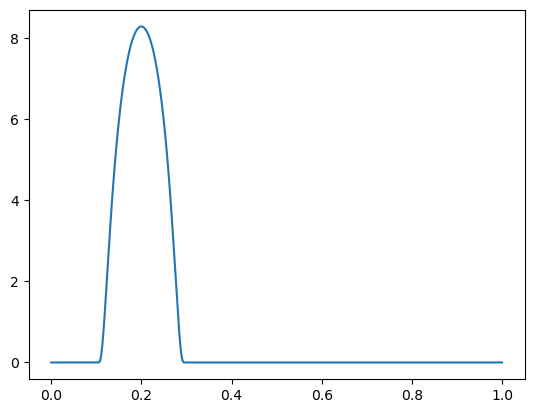

In [15]:
%matplotlib inline
bump = Bump_1D(domain=my_domain, center=0.2, width=0.2)

bump.plot()

Notice how we used the method "plot" for plotting the functions. This method is not present in all function classes.

We can also add, subtract, multiply and divide those functions with other functions. Multiplication by a scalar is allowed and works as expected, but addition or subtraction with a scalar is not defined. It might be weird to not allow things like sin(x) + 1, but it should not be: actually when we use sin(x) + 1 what we actually mean is sin(x) + "a function equal to 1 everywhere in the domain", but we don't say it explicitly. If we want to do something like f(r) + 1 we need to work with Constant functions. 

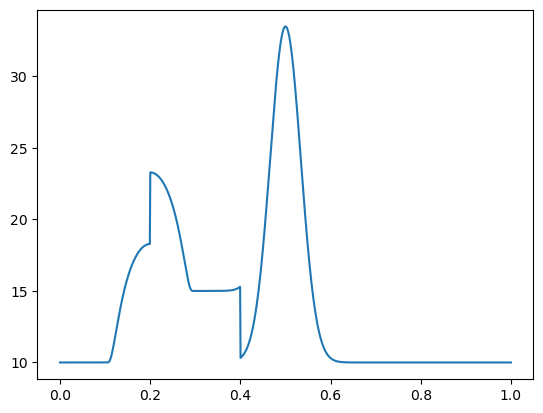

In [16]:
added = 2*gaussian + bump + boxcar + 10*Constant_1D(my_domain)

plt.plot(my_domain.mesh, added.evaluate(my_domain.mesh))
plt.show()

Division also works, but if the denominator function is zero at any points, then evaluating the resulting function will not be possible at those points (a "divided by 0" exception will be thrown)

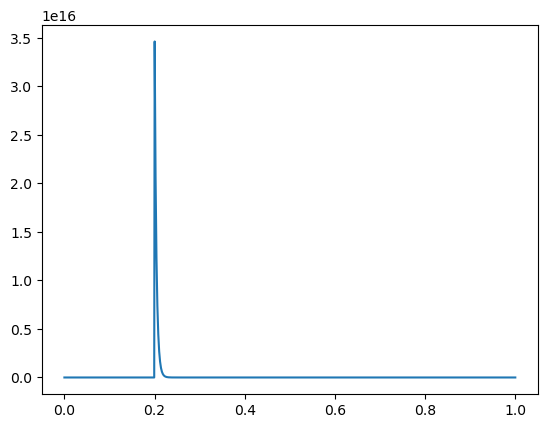

In [17]:
divided = boxcar / gaussian

plt.plot(my_domain.mesh, divided.evaluate(my_domain.mesh))
plt.show()